<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# Dimension Reduction - 차원 축소

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1 PCA(Principal Component Analysis) - 주성분 분석

- 피처 선택(Feature selection)
- 피처 추출(Feature extraction)

### 1.1 PCA 적용 - Iris 데이터 셋

#### 1.1.1 데이터 로딩

In [2]:
# Visual Python: Machine Learning > Data Sets
from sklearn.datasets import load_iris

ldata = load_iris()
# Create DataFrame
df_ldata = pd.DataFrame(data=ldata.data, columns=ldata.feature_names)
df_ldata['target'] = ldata.target
df_ldata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 1.1.2 데이터 시각화

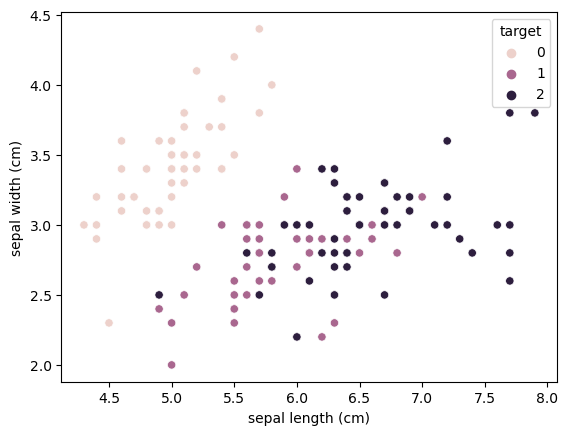

In [3]:
# Visual Python: Visualization > Seaborn
sns.scatterplot(data=df_ldata, x='sepal length (cm)', y='sepal width (cm)', hue='target')
plt.show()

#### 1.1.3 데이터 스케일링

In [4]:
# Visual Python: Machine Learning > Data Prep
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
# Visual Python: Machine Learning > Fit/Predict
X_scaled = scaler.fit_transform(df_ldata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

#### 1.2.4 PCA 적용

In [6]:
# Visual Python: Machine Learning > Dimension
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [7]:
# Visual Python: Machine Learning > Fit/Predict
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [8]:
print('원본 데이터 형태:', X_scaled.shape)
print('PCA 적용된 데이터 형태:', X_pca.shape)

원본 데이터 형태: (150, 4)
PCA 적용된 데이터 형태: (150, 2)


#### 1.2.5 PCA 성분
- 정보를 담고 있는 비율

In [9]:
# Visual Python: Machine Learning > Model Info
ratio = pca.explained_variance_ratio_
ratio

array([0.72962445, 0.22850762])

#### 1.2.6 PCA 적용된 DataFrame 생성

In [10]:
df_pca = pd.DataFrame(X_pca, columns=['col1', 'col2'])

df_pca['target']= df_ldata['target']
df_pca

,col1,col2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


#### 1.2.7 PCA 적용된 데이터 시각화

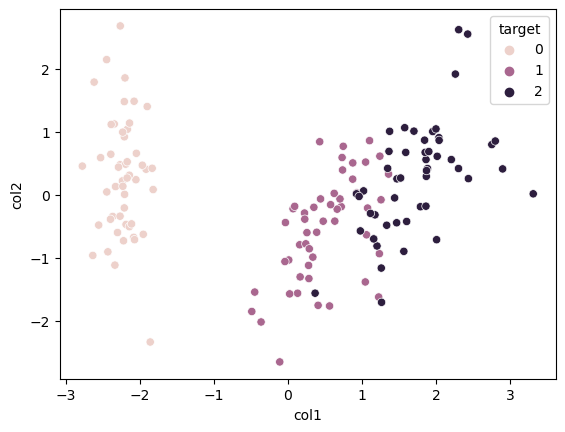

In [11]:
# Visual Python: Visualization > Seaborn
sns.scatterplot(data=df_pca, x='col1', y='col2', hue='target')
plt.show()

#### 1.2.8 분류 예측: 원본 데이터 사용

In [12]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ldata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], df_ldata['target'])

# [2] Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
print(metrics.classification_report(y_test, pred))

### Confusion Matrix

col_0,0,1,2,All
target,,,,
0,12,0,0,12
1,0,11,0,11
2,0,1,14,15
All,12,12,14,38


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### 1.2.9 분류 예측: PCA 적용된 데이터 사용

In [13]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pca[['col1', 'col2']], df_pca['target'])

# [2] Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
print(metrics.classification_report(y_test, pred))

### Confusion Matrix

col_0,0,1,2,All
target,,,,
0,13,0,0,13
1,0,5,3,8
2,0,0,17,17
All,13,5,20,38


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.62      0.77         8
           2       0.85      1.00      0.92        17

    accuracy                           0.92        38
   macro avg       0.95      0.88      0.90        38
weighted avg       0.93      0.92      0.92        38



---

In [14]:
# End of file